To improve clarity and maintainability, the Goodreads dataset analysis is
divided into multiple notebooks, each dedicated to a single phase of the
data science workflow. This notebook covers the current stage only.



**Navigation**
- ▶️ [01. Data Cleaning](https://www.kaggle.com/code/madisrinija/goodreads-dataset-cleaning)
- 📊 [02. Exploratory Data Analysis](https://www.kaggle.com/code/madisrinija/goodreads-dataset-eda/)
- 🧠 [03. Sentiment Insights (Analytical Project)](https://www.kaggle.com/code/madisrinija/goodreads-dataset-sentiment-insights/edit)
- 🤖 [04. Modeling](04_modeling.ipynb)

# PART 3: Sentiment Insights (Analytical Project)

## STEP 1: Install Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/goodreads-dataset-eda/Goodreads.csv")

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,...,reviewer_total_reviews,review_date,review_rating,review_length,sentiment_score,neg,neu,pos,compound,sentiment
0,1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,2262.0,2024-03-11,5.0,1199.0,0.9954,0.154,0.657,0.189,0.9954,Positive
1,2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,2262.0,2022-03-13,5.0,12.0,0.5574,0.074,0.676,0.250,0.5574,Positive
2,3,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,985.0,2015-05-26,5.0,12.0,-0.0829,0.249,0.587,0.163,-0.0829,Negative
3,4,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,81.0,2019-09-25,NaN,7.0,-0.5574,0.375,0.625,0.000,-0.5574,Negative
4,5,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback","June 21, 2003",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912.0,...,2262.0,2024-03-11,5.0,1211.0,0.9838,0.127,0.717,0.156,0.9838,Positive


## STEP 2: Aggregate and visualize reader emotions and satisfaction.

### 1. % Positive vs Negative Reviews

#### 1.1: Count sentiments per book

In [4]:
sentiment_count = df.groupby(['book_id','book_title','sentiment']) \
                    .size() \
                    .reset_index(name="count")

#### 1.2 Convert counts → percentages

In [5]:
sentiment_percent = sentiment_count.groupby(['book_id','book_title']) \
                    .apply(lambda x: x.assign(percent = (x['count'] / x['count'].sum()) *100)) \
                    .reset_index(drop=True)

/tmp/ipykernel_13/1900029177.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(percent = (x['count'] / x['count'].sum()) *100)) \


#### 1.3 Pivot for readability

In [6]:
sentiment_pivot = sentiment_percent.pivot(index=['book_id','book_title'],
                                           columns='sentiment', 
                                           values='percent') \
                                    .fillna(0).reset_index()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_13/331526730.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


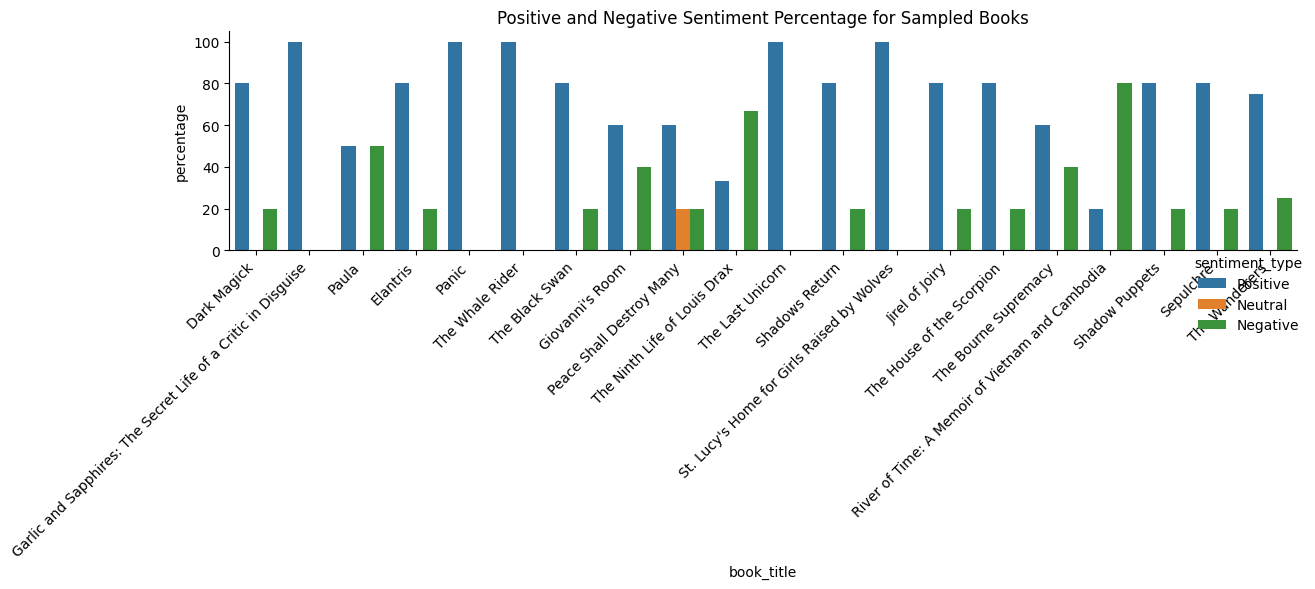

In [7]:
sentiment_plot_data = sentiment_pivot.sample(20).melt(id_vars=['book_id', 'book_title'], value_vars=['Positive','Neutral' ,'Negative'], var_name='sentiment_type', value_name='percentage')
sns.catplot(data=sentiment_plot_data, x='book_title', y='percentage', hue='sentiment_type', kind='bar', height=6, aspect=2)
plt.title('Positive and Negative Sentiment Percentage for Sampled Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Sentiment Trend Over Time (per book)

#### Step 2.1: Convert review_date → datetime

In [8]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

#### 2.2 Aggregate sentiment monthly per book

In [9]:
df['year_month'] = df['review_date'].dt.to_period('M')

sentiment_month_trend = df.groupby(['year_month','book_title'])['compound'].mean().reset_index().astype(str)

#### Step 2.3: Plot sentiment trend for a specific book

No of reviews for the book:  8


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


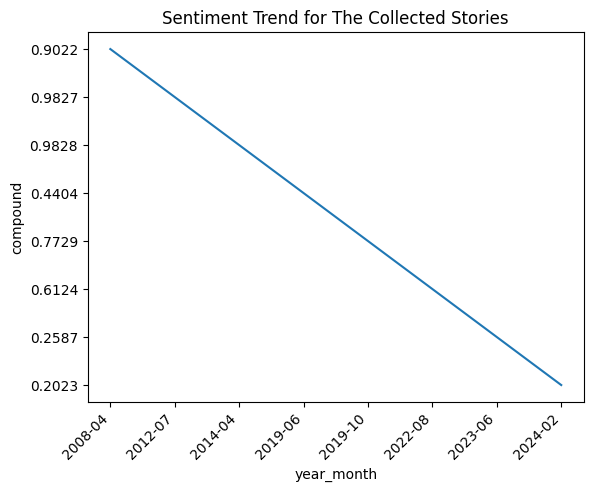

In [10]:
book_name = df['book_title'][4510]

book_trend = sentiment_month_trend[sentiment_month_trend['book_title'] == book_name]
print("No of reviews for the book: ",len(book_trend))

sns.lineplot(data=book_trend,x='year_month',y='compound')
plt.title(f"Sentiment Trend for {book_name}")
plt.xticks(rotation=45,ha="right")
plt.show()

### 3. Compare Sentiment vs average_rating

In [11]:
book_sentiment = df.groupby(['book_id','book_title'])['compound'].mean().reset_index(name='avg_sentiment')

book_overview = pd.merge(book_sentiment, df[['book_id', 'average_rating']], on='book_id', how='inner')

correlation_value = book_overview['avg_sentiment'].corr(book_overview['average_rating'])

correlation_matrix = pd.DataFrame([[correlation_value]],
                                  index=['Avg Sentiment'],
                                  columns=['Avg Rating'])

print(correlation_matrix)



               Avg Rating
Avg Sentiment    0.097647


### 4. Identify Emotion–Rating Mismatch Books

#### Overrated (high rating, low sentiment)

In [12]:
overrated = book_overview[
    (book_overview['average_rating'] >= 4.2) &
    (book_overview['avg_sentiment'] < 0.2)
].sort_values('average_rating', ascending=False)

overrated.head(10)


,book_id,book_title,avg_sentiment,average_rating
42495,6568189,Dear Jack,0.00000,5.00
38328,3242973,Transcendent Bread: 1976-1986,-0.36120,5.00
38205,3210327,"Born to Cheat: How Bush, Cheney, Rove & Co. Br...",-0.67380,5.00
61576,60044941,Heaven Official's Blessing: Tian Guan Ci Fu (N...,0.13818,4.82
61575,60044941,Heaven Official's Blessing: Tian Guan Ci Fu (N...,0.13818,4.82
61574,60044941,Heaven Official's Blessing: Tian Guan Ci Fu (N...,0.13818,4.82
61573,60044941,Heaven Official's Blessing: Tian Guan Ci Fu (N...,0.13818,4.82
61577,60044941,Heaven Official's Blessing: Tian Guan Ci Fu (N...,0.13818,4.82
60691,56925545,All the Young Dudes - Volume Two: Years 5 - 7,0.05756,4.81
60688,56925545,All the Young Dudes - Volume Two: Years 5 - 7,0.05756,4.81


#### Underrated (low rating, high sentiment)

In [13]:
underrated = book_overview[
    (book_overview['average_rating'] <= 3.5) &
    (book_overview['avg_sentiment'] > 0.4)
].sort_values('avg_sentiment', ascending=False)

underrated.head(10)


,book_id,book_title,avg_sentiment,average_rating
24016,294410,Paganini (Heyne allgemeine Reihe),0.99090,3.17
30315,774726,Look at Me,0.98598,3.42
30316,774726,Look at Me,0.98598,3.42
30317,774726,Look at Me,0.98598,3.42
30318,774726,Look at Me,0.98598,3.42
30314,774726,Look at Me,0.98598,3.42
32061,996683,The Secret Rites of Social Butterflies,0.98542,3.33
32062,996683,The Secret Rites of Social Butterflies,0.98542,3.33
32060,996683,The Secret Rites of Social Butterflies,0.98542,3.33
32059,996683,The Secret Rites of Social Butterflies,0.98542,3.33
